Hand-Written Digit Recognition using Neural Networks
=======


MNIST dataset from: <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>

In [7]:
## Code from "Python Machine Learning" By Sebastian Raschka
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST dataset from 'path'"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte'%kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte'%kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    
    return images, labels


X_train, y_train = load_mnist('/tmp/data/', 'train')
print("Number of training samples: %d \t Number of features: %d"%(X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('/tmp/data/', 't10k')
print("Number of test samples: %d "%(X_test.shape[0]))

Number of training samples: 60000 	 Number of features: 784
Number of test samples: 10000 


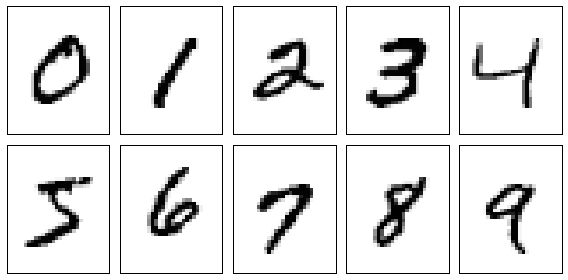

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,4), nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for y in range(10):
    img = X_train[y_train == y][0].reshape(28,28)
    ax[y].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
### Adapted from "Python Machine Learning" by Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys

class NeuralNework(object):
    def __init__(self, n_output, n_features, n_hidden, 
                 epochs=500, eta=0.001, alpha=0.0, random_seed=None):
        np.random.seed(random_seed)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.W1, self.W2 = self._initialize_weights()
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        
    def _encode_labels(self, y, k):
        onehot = np.zeros(shape=(k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _initialize_weights(self):
        W1 = np.random.uniform(-1, 1, size=(n_hidden,self.n_features + 1))        
        W2 = np.random.uniform(-1, 1, size=(self.n_output, n_hidden + 1))
        return (W1, W2)
    
    def _sigmoid(self, z):
        return expit(z)
    
    def _tanh(self, z):
        e_pos_z = np.exp(z)
        e_neg_z = np.exp(-z)
        return (e_pos_z - e_neg_z)/(e_pos_z + e_neg_z)
    
    def _ReLU(self, z):
        val = z
        if z
    
    def _sigmoid_gradient(self, z):
        sigval = self._sigmoid(z)
        return sigmal*(1-sigval)
    
    def _tanh_gradient(self, z):
        tanhval = self._tanh(z)
        return (1-tanhval**2)
        
    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.vstack(X, np.ones(shape=(X.shape[0], 1)))
        elif how == 'row':
            X_new = np.hstack(np.ones(X.shape[0], 1), X)
        else:
            raise AttributeError("Argument 'how' must be 'column' or 'row'")
        return X_new

    def _layer_forward_linear(self, X, W):
        z = self.dot(X.T)
        activ = z
        return X_w_bias, z, activ
    
    def _layer_forward_sigmoid(self, X, W):
        z = self.dot(X.T)
        activ = self._sgimoid(z)
        return X_w_bias, z, activ
        
    def _layer_forward_tanh(self, X, W):
        z = self.dot(X.T)
        activ = self._sgimoid(z)
        return X_w_bias, z, activ

    
    def _feed_forward_full(self, X, W1, W2):
        X_w_bias = self._add_bias_unit(X, how='column')
        X1, z1, a1 = self._layer_forward(X_w_bias, W1)
        a1_w_bias = self._add_bias_unit(X, how='row')
        X2, z2, a2 = self._layer_forward(a1_w_bias, W2)
        return X_w_bias, z1, a1_w_bias, z2, a2
    
    def _get_cost(self, y_true, y_pred, W1, W2):
        """Cost: -y*ln(ypred) - (1-y)*ln(1-ypred)"""
        term1 = -y_true*np.log(y_pred)
        term2 = -(1-y_true)*np.log(1 - y_pred)
        cost = term1 + term2
        return cost
    
    def _layer_backward(self, Y, W)
        gradW1, gradW2 = sel